In [43]:
train_data = read.csv('train.csv')
test_data = read.csv('test.csv')

In [44]:
install.packages("e1071", dep = TRUE, type = "source")

also installing the dependencies ‘randomForest’, ‘SparseM’

Warning message in install.packages("e1071", dep = TRUE, type = "source"):
“installation of package ‘randomForest’ had non-zero exit status”Warning message in install.packages("e1071", dep = TRUE, type = "source"):
“installation of package ‘SparseM’ had non-zero exit status”

In [45]:
install.packages("hydroGOF", repos = "http://cran.r-project.org")


The downloaded binary packages are in
	/var/folders/qk/0vhw5p4n2610vyrs2zqjmj2h0000gn/T//RtmpQWzOXD/downloaded_packages


In [46]:
#Load Library
library(e1071)
library(hydroGOF)

In [47]:
# 5.1 convert data type----------------
train_data$season = as.factor(train_data$season)
train_data$mnth = as.factor(train_data$mnth)
train_data$holiday = as.factor(train_data$holiday)
train_data$workingday = as.factor(train_data$workingday)
train_data$weathersit = as.factor(train_data$weathersit)
train_data$weekday = as.factor(train_data$weekday)

test_data$season = as.factor(test_data$season)
test_data$mnth = as.factor(test_data$mnth)
test_data$holiday = as.factor(test_data$holiday)
test_data$workingday = as.factor(test_data$workingday)
test_data$weathersit = as.factor(test_data$weathersit)
test_data$weekday = as.factor(test_data$weekday)

In [55]:
#5.2 Regression with SVM---------------

# delete temp
modelsvm1 = svm(target~season+mnth+holiday+weekday+workingday+weathersit+atemp+hum+windspeed+week_moving_avg,data=train_data)
predYsvm1 = as.integer(predict(modelsvm1, test_data))
svm1_profit <- sum(pmin(predYsvm1,test_data$target)*3 - predYsvm1*2) 
# profit is 1356338

In [56]:
modelsvm1


Call:
svm(formula = target ~ week_moving_avg, data = train_data)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 
    epsilon:  0.1 


Number of Support Vectors:  299


In [57]:
svm1_profit

[1] 1139801

In [58]:
predYsvm1

[1] 1957 2302 2497 2652 2639 2627 2681 2986 3389 3647 3671 3879 3693 3693 3466
 [16] 3301 3290 3055 3193 3061 3076 3197 3013 2954 2859 3038 3216 3379 3754 4089
 [31] 4211 4104 4140 4215 4258 4275 4218 4118 4003 3971 3811 3758 3924 3795 3405
 [46] 3235 3435 3494 3349 3694 4149 4036 3908 3843 4127 4259 4139 4145 4184 4261
 [61] 4203 3682 3935 4010 4116 3974 3803 4146 4134 4424 4475 4532 4603 4594 4552
 [76] 4484 4314 4283 3884 3803 3762 3791 3786 3490 3440 3720 3875 3950 4107 4264
 [91] 4500 4281 4118 4051 3934 3786 3747 3622 3595 3506 3590 3736 3804 4025 4170
[106] 4231 3916 3708 3652 3453 3559 3542 3560 3618 4328 4597 4538 4560 4601 4589
[121] 4526 4195 4204 4263 4111 4085 3797 3720 3623 3561 3612 3830 3793 3773 3637
[136] 3656 4046 3989 3870 3822 3794 3529 3226 3259 3338 3523 3621 3820 3902 3611
[151] 3615 3560 3550 3487 3770 3581 3420 3324 3315 3333 3186 3196 3200 3212 3224
[166] 3332 3337 3364 3352 3282 3265 3259 3290 3367 3527 3751 3690 3487 3491 3381
[181] 3285 3234 3344 3442 3569 3715 3804 3735 3637 3576 3658 3862 3875 4030 3887
[196] 3720 3427 3268 3298 3268 3294 3420 3506 3628 3831 3753 3730 3509 3367 3300
[211] 3196 3219 3233 3254 3306 3266 3249 3228 3220 3296 3309 3329 3311 3304 3376
[226] 3317 3349 3378 3442 3436 3300 3255 3204 3310 3327 3350 3367 3323 3343 3255
[241] 3327 3333 3357 3362 3352 3272 3231 3283 3347 3413 3467 3588 3447 3432 3276
[256] 3244 3218 3174 3168 3145 3143 3144 3150 3233 3242 3255 3283 3233 3198 3145
[271] 3146 3146 3152 3164 3156 3163 3176 3288 3278 3283 3306 3249 3481 3404 3516
[286] 3478 3539 3616 3296 3238 3262 3270 3275 3264 3369 3276 3232 3252 3252 3244
[301] 3181 3198 3174 3257 4029 4607 4544 4413 4148 4246 4604 4287 4272 4384 4440
[316] 4348 4167 3946 3866 3996 3971 4048 4163 4320 4486 4343 4326 4361 4599 4588
[331] 4403 3966 3875 3675 4139 4336 4601 4529 4557 4356 4188 4133 4173 4197 4070
[346] 4441 4554 4567 4570 4539 4537 4372 4506 4566 4553 4567 4607 4573 4405 4013
[361] 3215 2409 1692 1474 1665 1594

In [19]:
# delete atemp
modelsvm2 = svm(target~season+mnth+holiday+weekday+workingday+weathersit+hum+windspeed+week_moving_avg,data=train_data)
predYsvm2 = as.integer(predict(modelsvm2, test_data))
svm2_profit <- sum(pmin(predYsvm2,test_data$target)*3 - predYsvm2*2) 
# profit is 1398747 

[1] 1895.42


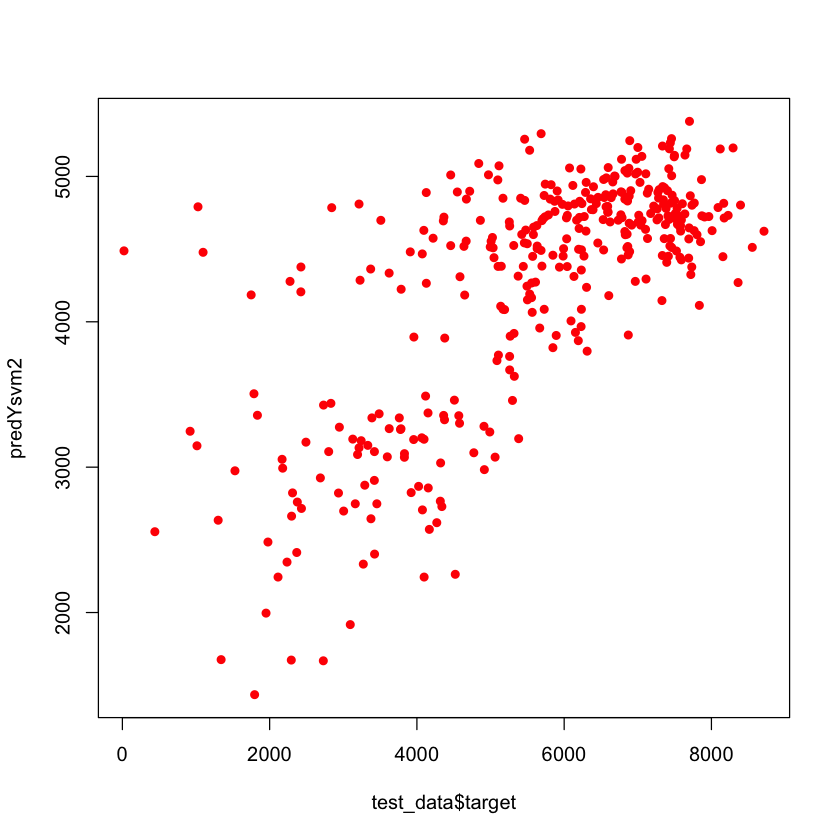

In [20]:
#Overlay SVM Predictions on Scatter Plot
plot(test_data$target, predYsvm2, col = "red", pch=16)
library(hydroGOF)
RMSEsvm=rmse(predYsvm2,test_data$target)
print(RMSEsvm)

In [21]:
## Tuning SVR model by varying values of maximum allowable error and cost parameter

#Tune the SVM model
OptModelsvm=tune(svm, target~season+mnth+holiday+weekday+workingday+weathersit+atemp+hum+windspeed+week_moving_avg,data=train_data,ranges=list(elsilon=seq(0,1,0.1), cost=1:100))
#Print optimum value of parameters
print(OptModelsvm)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 elsilon cost
       0    7

- best performance: 630781.1 



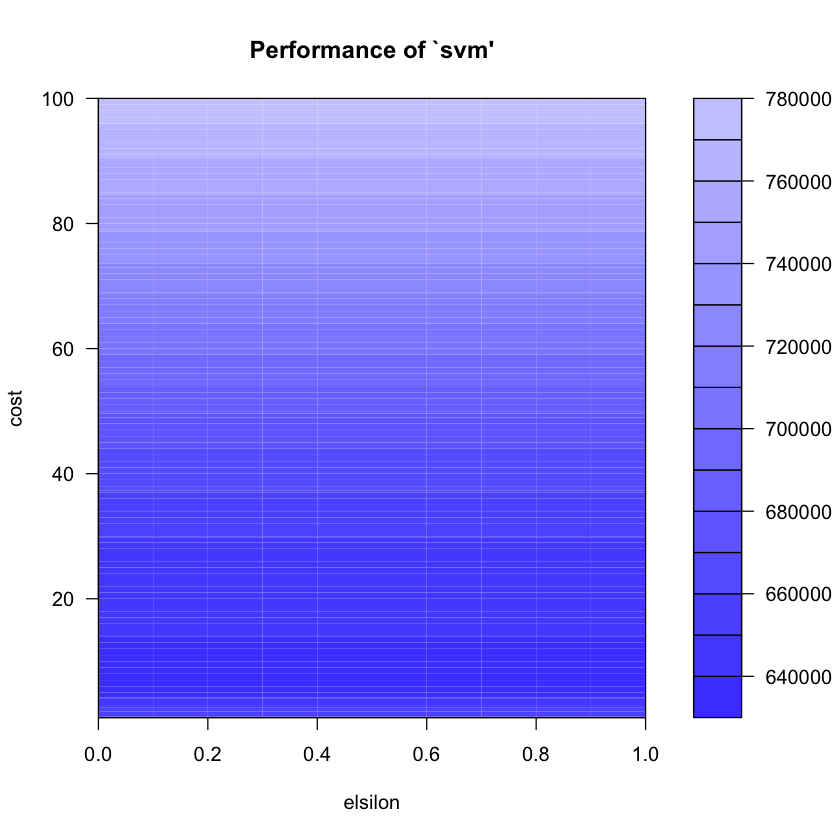

In [22]:
#Plot the perfrormance of SVM Regression model
plot(OptModelsvm)

In [23]:
#Find out the best model
BstModel=OptModelsvm$best.model

In [24]:
#Predict Y using best model
PredYBst=predict(BstModel,test_data)

In [25]:
#Calculate RMSE of the best model 
RMSEBst=rmse(PredYBst,test_data$target)
svmBst_profit <- sum(pmin(PredYBst,test_data$target)*3 - PredYBst*2) 

In [26]:
svmBst_profit

[1] 1211202